# Short Demo 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# contour plotting routines used by many cosmologists: 
# http://getdist.readthedocs.org/en/latest/
import getdist as gd
from getdist import plots, MCSamples

# the two likelihood modules we present
from Likelihood import Likelihood_after_Gaussianization, Gaussian_Likelihood

This notebook provides a short demo of the Likelihood modules we present in \textt{Likelihood.py}. We provide an analytical approximation to the Planck 15 fiducial CMB constraints on the cosmological parameters in the models: flat $\Lambda$CDM, curved $\Lambda$CDM, and flat $+A_L$ $\Lambda$CDM. For further details, see Grandis et al. 2016.

## flat $\Lambda$CDM

In [24]:
fl_ldcm_path = 'TT_lowTEB/base/'
fl_ldcm_like = Gaussian_Likelihood(fl_ldcm_path)

# evaluate likelihood in point of parameter space
theta = np.array([68, 0.02, 0.11, 0.96, 3.1])
print fl_ldcm_like.Likelihood(theta)

-140.514295685


In [25]:
# this likelihood is significantly quicker that calling CAMB/CLASS each time
%timeit fl_ldcm_like.Likelihood(theta)

The slowest run took 4.97 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 57.5 µs per loop


In [26]:
fl_ldcm_sample = fl_ldcm_like.create_sample(num=10000)
print fl_ldcm_sample.shape

(5, 10000)


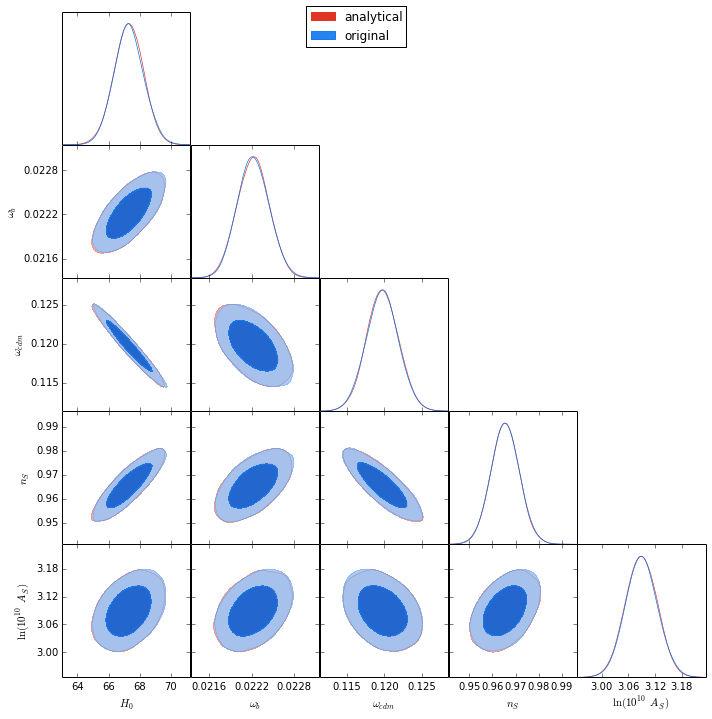

In [27]:
names = ['H_0', '\omega_b', '\omega_{cdm}', 'n_S', '\ln(10^{10}\,A_S)']
labels = names
analytical = MCSamples(samples=fl_ldcm_sample.T,
                       names=names, labels=labels)
original = MCSamples(samples=np.genfromtxt(fl_ldcm_path+'chain_1.txt'),
                     weights=np.genfromtxt(fl_ldcm_path+'weights_1.txt'),
                       names=names, labels=labels)

g = plots.getSubplotPlotter()
g.triangle_plot([analytical, original], filled=True,
                legend_labels=['analytical', 'original'])

# curved $\Lambda$CDM

In [28]:
curv_ldcm_path = 'TT_lowTEB/omegak/'
curv_ldcm_like = Likelihood_after_Gaussianization(curv_ldcm_path)

# evaluate likelihood in point of parameter space
theta = np.array([5.45e+01, 2.235e-02, 1.21e-01, 9.67e-01, 3.03, -3.79e-02])
# do not move too far from the degenerancy, otherwise the result will be -inf
print curv_ldcm_like.Likelihood(theta)

-3.22620170624


In [29]:
# this likelihood is significantly quicker that calling CAMB/CLASS each time
%timeit curv_ldcm_like.Likelihood(theta)

1000 loops, best of 3: 542 µs per loop


In [33]:
curv_ldcm_sample = curv_ldcm_like.create_sample(num=10000)
print curv_ldcm_sample.shape

(6, 10000)


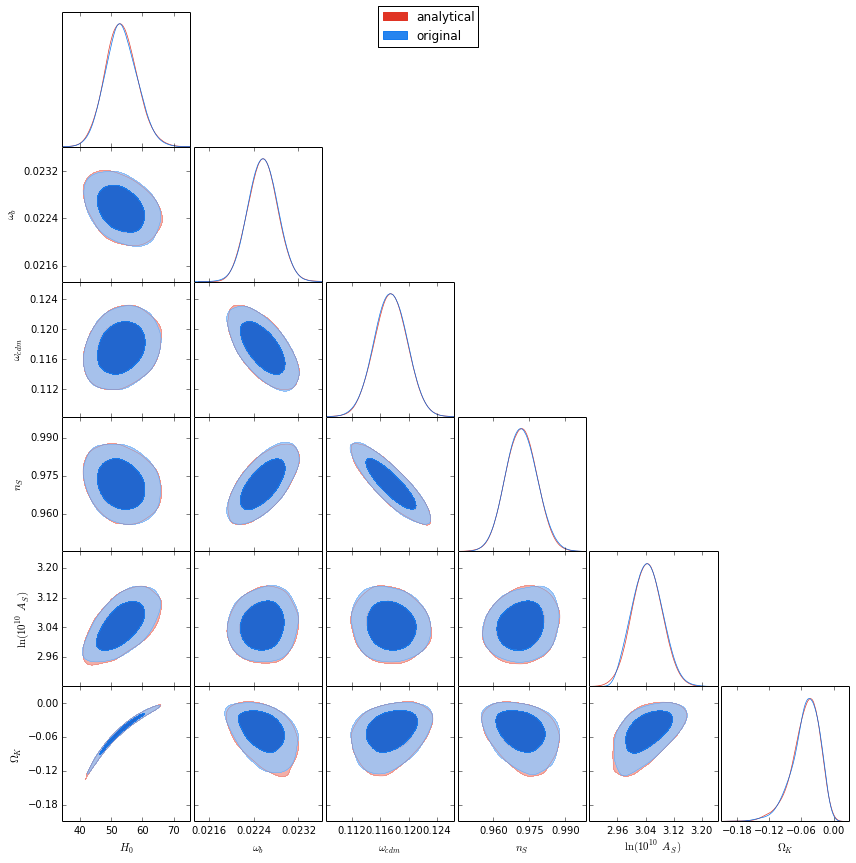

In [34]:
names = ['H_0', '\omega_b', '\omega_{cdm}', 'n_S', '\ln(10^{10}\,A_S)', '\Omega_K']
labels = names
analytical = MCSamples(samples=curv_ldcm_sample.T,
                       names=names, labels=labels)
original = MCSamples(samples=np.genfromtxt(curv_ldcm_path+'chain_1.txt'),
                     weights=np.genfromtxt(curv_ldcm_path+'weights_1.txt'),
                       names=names, labels=labels)

g = plots.getSubplotPlotter()
g.triangle_plot([analytical, original], filled=True,
                legend_labels=['analytical', 'original'])
# if this plot does not work, please try to draw the sample again: you might 
# have picked a point outside the support of my approximation.

# flat $+A_L$ $\Lambda$CDM

In [ ]:
al_ldcm_path = 'TT_lowTEB/Alens/'
al_ldcm_like = Likelihood_after_Gaussianization(al_ldcm_path)

# evaluate likelihood in point of parameter space
theta = np.array([6.94e+01, 2.28e-02, 1.15e-01, 9.79e-01, 3.08, 1.23])
print al_ldcm_like.Likelihood(theta)

In [ ]:
# this likelihood is significantly quicker that calling CAMB/CLASS each time
%timeit al_ldcm_like.Likelihood(theta)

In [ ]:
al_ldcm_sample = al_ldcm_like.create_sample(num=100000)
print al_ldcm_sample.shape

In [ ]:
names = ['H_0', '\omega_b', '\omega_{cdm}', 'n_S', '\ln(10^{10}\,A_S)', 'A_L']
labels = names
analytical = MCSamples(samples=al_ldcm_sample.T,
                       names=names, labels=labels)
original = MCSamples(samples=np.genfromtxt(al_ldcm_path+'chain_1.txt'),
                     weights=np.genfromtxt(al_ldcm_path+'weights_1.txt'),
                       names=names, labels=labels)

g = plots.getSubplotPlotter()
g.triangle_plot([analytical, original], filled=True,
                legend_labels=['analytical', 'original'])
# if this plot does not work, please try to draw the sample again: you might 
# have picked a point outside the support of my approximation.

For any questions, feel free to write to s.grandis@lmu.de. I am very happy to try and Gaussianize also your sample, if needed.